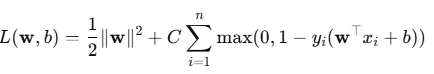

In [1]:
from IPython.display import Image
Image('hinge_loss.png')

In [2]:
import numpy as np

# SVM with linear kernel

In [3]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param # Это аналог 1/C
        self.n_iters = n_iters
        self.w, self.b = None, None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y<= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2*self.lambda_param * self.w)
                    # bias не обновляется
                else:
                    self.w -= self.lr * (2*self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b += self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.where(approx >= 0,1,0)
        

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Генерация данных
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Моя модель
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
print("Точность своей модели:", accuracy_score(y_test, preds))

# sklearn SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
print("Точность sklearn:", clf.score(X_test, y_test))


Точность своей модели: 0.86
Точность sklearn: 0.87


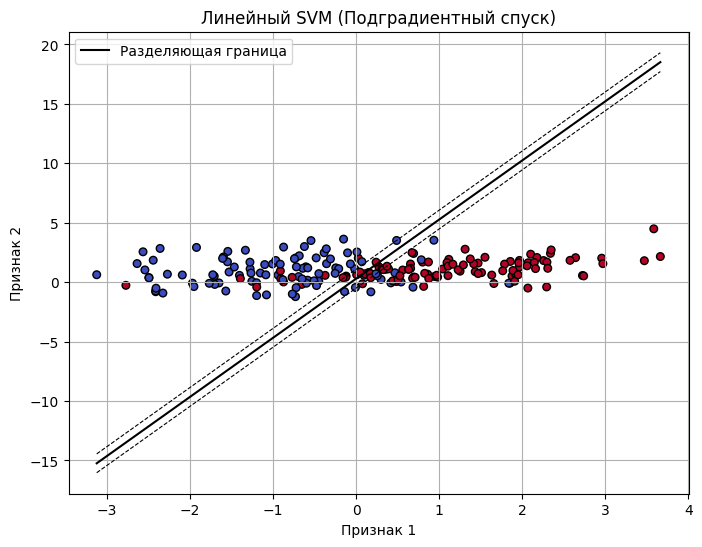

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# Генерация 2D-данных
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)
y_bin = np.where(y == 0, -1, 1)  # для отображения

# Обучение твоей модели
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)
preds = svm.predict(X)

# Визуализация точек
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

# Получаем параметры разделяющей прямой
w = svm.w
b = svm.b

# Уравнение прямой: w1*x + w2*y + b = 0 → y = -(w1/w2)*x - b/w2
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y0 = -(w[0] / w[1]) * x0 - b / w[1]

# Границы маржи (для поддержки вектора)
margin = 1 / np.linalg.norm(w)
y_margin_up = y0 + margin
y_margin_down = y0 - margin

# Рисуем
plt.plot(x0, y0, 'k-', label='Разделяющая граница')
plt.plot(x0, y_margin_up, 'k--', linewidth=0.8)
plt.plot(x0, y_margin_down, 'k--', linewidth=0.8)
plt.legend()
plt.title("Линейный SVM (Подградиентный спуск)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)
plt.show()


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Загружаем Iris
data = load_iris()
X = data.data
y = data.target

# Оставим только 2 класса (0 и 1) и 2 признака (например, 0 и 2)
binary_mask = y < 2
X = X[binary_mask][:, [0, 2]]  # Признак 0 (длина чашелистика) и 2 (длина лепестка)
y = y[binary_mask]

# Разделение и стандартизация
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Моя модель
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)
my_preds = svm.predict(X_test)
print("Точность своей модели:", accuracy_score(y_test, my_preds))

# sklearn SVC
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
sk_preds = svc.predict(X_test)
print("Точность sklearn:", accuracy_score(y_test, sk_preds))


Точность своей модели: 1.0
Точность sklearn: 1.0


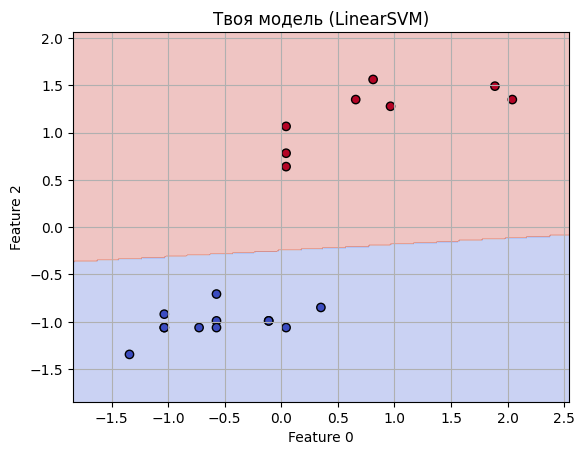

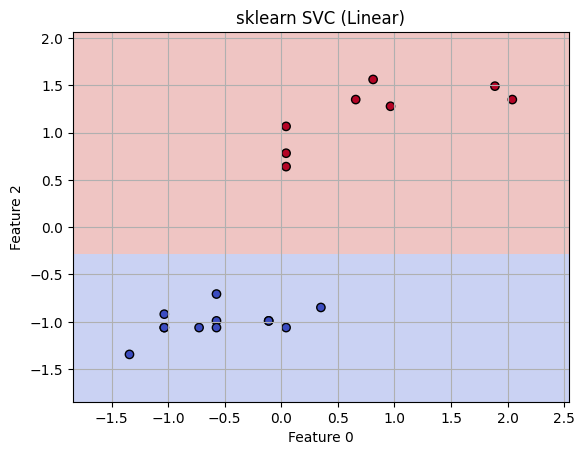

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Визуализация
plot_decision_boundary(svm, X_test, y_test, "Твоя модель (LinearSVM)")
plot_decision_boundary(svc, X_test, y_test, "sklearn SVC (Linear)")


# SVM with polynomial kernel

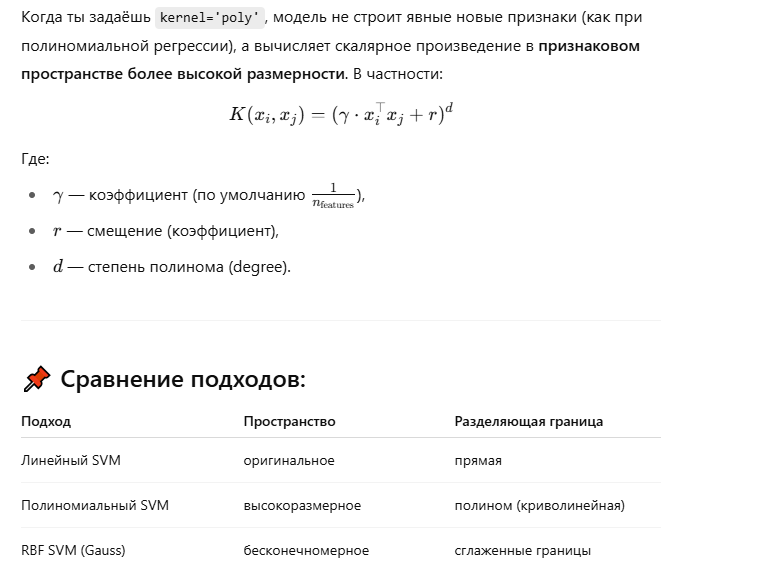

In [9]:
Image('poly.png')

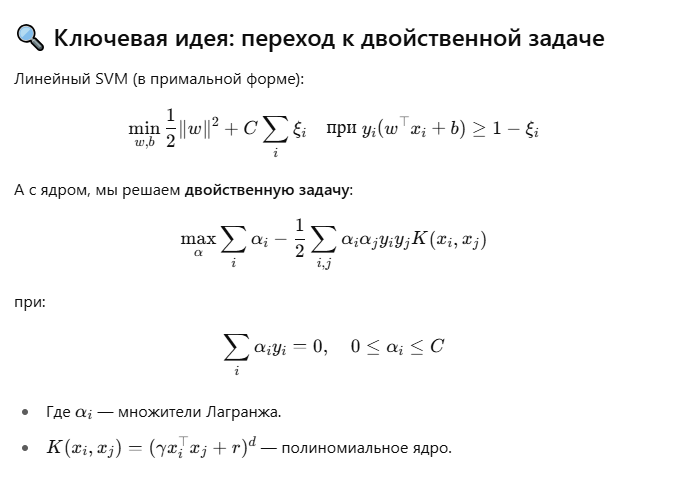

In [10]:
Image('dual.png')

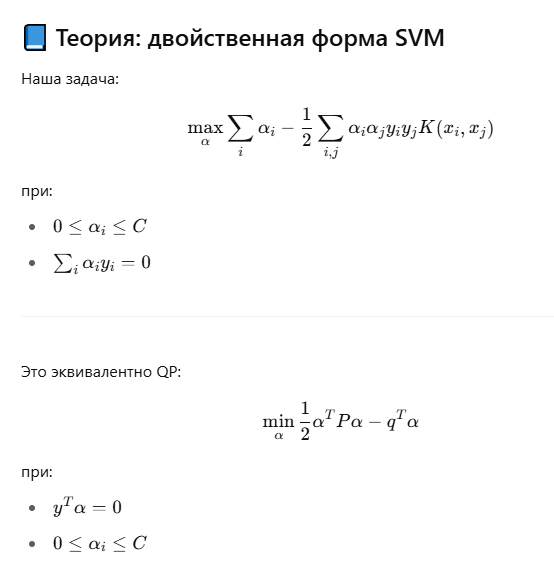

In [11]:
Image('dual_solve.png')

In [22]:
import numpy as np

def polynomial_kernel(X1, X2, degree=3, gamma=1, coef0=1): # полиномиальное ядро K(x,x′)=(γ⋅xT*x′+c0​)^d
    return (gamma * X1 @ X2.T + coef0) ** degree

def compute_kernel_matrix(X, kernel_fn): # Строит матричное представление ядра 𝐾𝑖𝑗=𝐾(𝑥𝑖,𝑥𝑗), нужное для QP-задачи
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_fn(X[i], X[j])
    return K


In [23]:
from cvxopt import matrix, solvers

class KernelSVM:
    def __init__(self, kernel=polynomial_kernel, C=1.0, degree=3, gamma=1, coef0=1):
        self.kernel = lambda x, y: kernel(x, y, degree=degree, gamma=gamma, coef0=coef0)
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.X = X
        self.y = y.astype(float)

        K = compute_kernel_matrix(X, self.kernel) # Вычисление матрицы ядра

        # Сбор матриц для QP-задачи:
        P = matrix(np.outer(y, y) * K, tc='d')
        q = matrix(-np.ones(n_samples), tc='d')
        G_std = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))), tc='d')
        h_std = matrix(np.hstack((np.zeros(n_samples), self.C * np.ones(n_samples))), tc='d')
        A = matrix(y.reshape(1, -1), tc='d')
        b = matrix(np.zeros(1), tc='d')
    
        sol = solvers.qp(P, q, G_std, h_std, A, b) # Решение QP-задачи:
        alphas = np.ravel(sol['x'])

        # Support vectors
        sv = alphas > 1e-5 # Выбор support vectors
        self.alphas = alphas[sv]
        self.sv_X = X[sv]
        self.sv_y = y[sv]

        # Bias
        self.b = np.mean([
            y_k - np.sum(self.alphas * self.sv_y * self.kernel(x_k, self.sv_X))
            for x_k, y_k in zip(self.sv_X, self.sv_y)
        ])

    def project(self, X): # Проецирует новые точки в пространство решения
        return np.array([
            np.sum(self.alphas * self.sv_y * self.kernel(x, self.sv_X)) + self.b
            for x in X
        ])

    def predict(self, X):
        return np.sign(self.project(X))


In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Подготовка данных (2 класса, 2 признака)
X, y = load_iris(return_X_y=True)
X, y = X[y < 2][:, [0, 2]], y[y < 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Моя реализация
svm = KernelSVM(C=1.0, degree=3)
svm.fit(X_train, y_train * 2 - 1)  # -1, 1
y_pred = (svm.predict(X_test) > 0).astype(int)
print("Точность своей модели:", accuracy_score(y_test, y_pred))

# Sklearn
svc = SVC(kernel='poly', degree=3, C=1.0)
svc.fit(X_train, y_train)
print("Точность sklearn:", accuracy_score(y_test, svc.predict(X_test)))


     pcost       dcost       gap    pres   dres
 0: -1.2166e+00 -9.6828e+01  4e+02  2e+00  4e-15
 1: -5.1791e-01 -3.8942e+01  6e+01  2e-01  3e-15
 2: -8.9709e-02 -8.5767e+00  1e+01  3e-02  3e-15
 3: -1.6622e-01 -2.1125e+00  2e+00  5e-03  1e-15
 4: -2.9426e-01 -7.6158e-01  5e-01  1e-03  8e-16
 5: -3.8771e-01 -4.7499e-01  9e-02  1e-04  6e-16
 6: -4.0633e-01 -4.2774e-01  2e-02  3e-05  5e-16
 7: -4.1226e-01 -4.1792e-01  6e-03  2e-16  4e-16
 8: -4.1452e-01 -4.1471e-01  2e-04  1e-16  6e-16
 9: -4.1463e-01 -4.1463e-01  2e-06  2e-16  8e-16
10: -4.1463e-01 -4.1463e-01  2e-08  2e-16  5e-16
Optimal solution found.
Точность своей модели: 1.0
Точность sklearn: 1.0


     pcost       dcost       gap    pres   dres
 0: -5.9501e+01 -5.1117e+02  3e+03  3e+00  5e-14
 1: -3.8330e+01 -3.4234e+02  6e+02  5e-01  2e-14
 2: -2.4897e+01 -1.2983e+02  1e+02  8e-02  2e-14
 3: -2.5134e+01 -5.3007e+01  3e+01  2e-02  1e-14
 4: -2.6978e+01 -4.3250e+01  2e+01  8e-03  1e-14
 5: -2.9639e+01 -3.4583e+01  5e+00  2e-03  1e-14
 6: -3.0741e+01 -3.2366e+01  2e+00  4e-04  1e-14
 7: -3.1127e+01 -3.1640e+01  5e-01  6e-05  1e-14
 8: -3.1318e+01 -3.1369e+01  5e-02  7e-16  1e-14
 9: -3.1342e+01 -3.1343e+01  5e-04  2e-15  1e-14
10: -3.1342e+01 -3.1342e+01  5e-06  1e-15  1e-14
Optimal solution found.


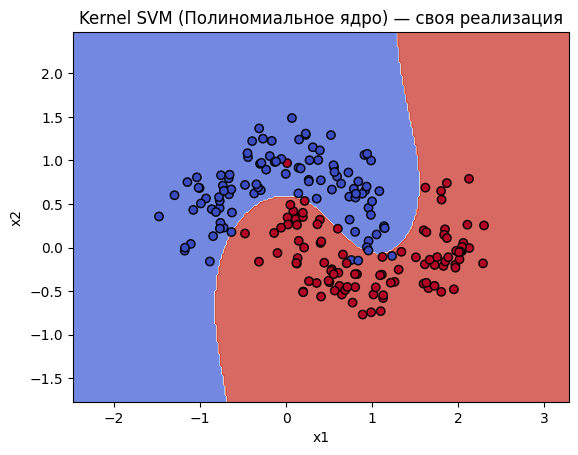

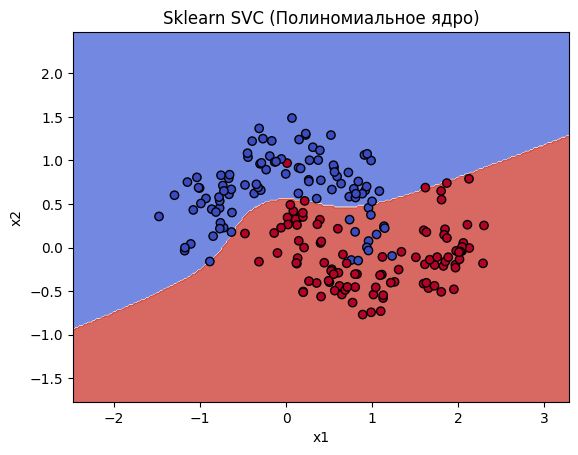

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Создаём данные
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Преобразуем y из {0, 1} в {-1, 1} для своей модели
y_signed = y * 2 - 1

# Обучаем свою модель
svm = KernelSVM(C=1.0, degree=3)
svm.fit(X, y_signed)

# Обучаем sklearn для сравнения
svc = SVC(kernel='poly', degree=3, C=1.0)
svc.fit(X, y)

# ---- Функция визуализации ----
def plot_decision_boundary(model, X, y, title, is_custom=False):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if is_custom:
        Z = model.predict(grid)
        Z = (Z > 0).astype(int)  # Вернуть обратно в {0, 1}
    else:
        Z = model.predict(grid)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# ---- Построение графиков ----
plot_decision_boundary(svm, X, y, "Kernel SVM (Полиномиальное ядро) — своя реализация", is_custom=True)
plot_decision_boundary(svc, X, y, "Sklearn SVC (Полиномиальное ядро)")


# SVM with RBF kernel

In [32]:
def rbf_kernel(x, X, gamma=1.0):
    """RBF kernel: принимает 1xD вектор и NxD матрицу"""
    return np.exp(-gamma * np.sum((x - X) ** 2, axis=1))



In [33]:
def compute_kernel_matrix(X, kernel_fn):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        K[i, :] = kernel_fn(X[i], X)
    return K

#### по сути реализация ничем не отлчается от "поли", только ядро поменяли на рбф с соответствующей формулой и всё!

In [34]:
class KernelSVM:
    def __init__(self, kernel=rbf_kernel, C=1.0, gamma=1.0):
        self.kernel = lambda x, X: kernel(x, X, gamma=gamma)
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.X = X
        self.y = y.astype(float)

        K = compute_kernel_matrix(X, self.kernel) # Вычисление матрицы ядра

        # Сбор матриц для QP-задачи:
        P = matrix(np.outer(y, y) * K, tc='d')
        q = matrix(-np.ones(n_samples), tc='d')
        G_std = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))), tc='d')
        h_std = matrix(np.hstack((np.zeros(n_samples), self.C * np.ones(n_samples))), tc='d')
        A = matrix(y.reshape(1, -1), tc='d')
        b = matrix(np.zeros(1), tc='d')
    
        sol = solvers.qp(P, q, G_std, h_std, A, b) # Решение QP-задачи:
        alphas = np.ravel(sol['x'])

        # Support vectors
        sv = alphas > 1e-5 # Выбор support vectors
        self.alphas = alphas[sv]
        self.sv_X = X[sv]
        self.sv_y = y[sv]

        # Bias
        self.b = np.mean([
            y_k - np.sum(self.alphas * self.sv_y * self.kernel(x_k, self.sv_X))
            for x_k, y_k in zip(self.sv_X, self.sv_y)
        ])

    def project(self, X): # Проецирует новые точки в пространство решения
        return np.array([
            np.sum(self.alphas * self.sv_y * self.kernel(x, self.sv_X)) + self.b
            for x in X
        ])

    def predict(self, X):
        return np.sign(self.project(X))


In [35]:
# Данные
X, y = make_moons(n_samples=150, noise=0.2, random_state=42)
y_binary = y * 2 - 1  # для своей модели {-1, 1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Наша модель ----
svm_rbf = KernelSVM(kernel=rbf_kernel, C=1.0, gamma=1.0)
svm_rbf.fit(X_train, y_train * 2 - 1)  # {0,1} → {-1,1}
y_pred_custom = (svm_rbf.predict(X_test) > 0).astype(int)

# ---- Sklearn модель ----
svm_sklearn = SVC(kernel='rbf', C=1.0, gamma=1.0)
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)

# ---- Сравнение ----
acc_custom = accuracy_score(y_test, y_pred_custom)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Точность моей модели (RBF):     {acc_custom:.2f}")
print(f"Точность sklearn SVM (RBF):      {acc_sklearn:.2f}")


     pcost       dcost       gap    pres   dres
 0: -2.0635e+01 -1.9945e+02  8e+02  2e+00  8e-16
 1: -1.4006e+01 -1.1031e+02  1e+02  3e-16  7e-16
 2: -1.8671e+01 -3.9076e+01  2e+01  6e-16  6e-16
 3: -2.1697e+01 -2.8338e+01  7e+00  2e-16  5e-16
 4: -2.3204e+01 -2.5016e+01  2e+00  9e-16  6e-16
 5: -2.3621e+01 -2.4141e+01  5e-01  4e-16  5e-16
 6: -2.3784e+01 -2.3862e+01  8e-02  1e-15  7e-16
 7: -2.3815e+01 -2.3817e+01  3e-03  2e-15  6e-16
 8: -2.3816e+01 -2.3816e+01  3e-04  7e-16  6e-16
 9: -2.3816e+01 -2.3816e+01  4e-06  2e-16  7e-16
Optimal solution found.
Точность моей модели (RBF):     0.89
Точность sklearn SVM (RBF):      0.89


In [36]:
def plot_comparison(svm1, svm2, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # --- Моя МОДЕЛЬ ---
    Z1_raw = svm1.project(grid)
    Z1 = (Z1_raw > 0).astype(int).reshape(xx.shape)

    # --- SKLEARN ---
    Z2 = svm2.predict(grid).reshape(xx.shape)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
    axs[0].contour(xx, yy, Z1_raw.reshape(xx.shape), levels=[0], colors='k')  # граница
    axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    axs[0].set_title("Моя реализация RBF SVM")

    axs[1].contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
    axs[1].contour(xx, yy, Z2, levels=[0.5], colors='k')  # граница
    axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    axs[1].set_title("Sklearn RBF SVM")

    plt.show()


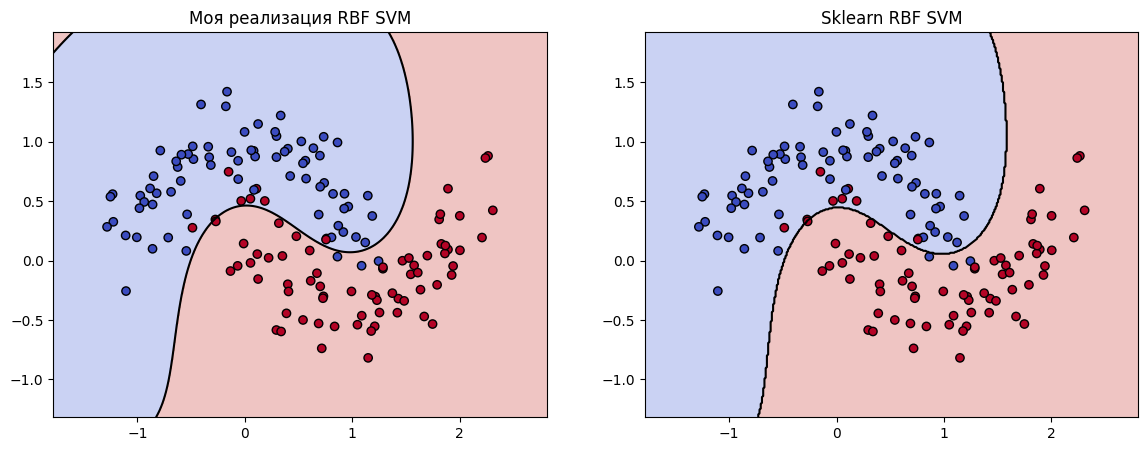

In [37]:
plot_comparison(svm_rbf, svm_sklearn, X, y)